In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv("Air_lines_cleaned.csv")

In [5]:
df.columns.to_list

<bound method IndexOpsMixin.tolist of Index(['DayOfWeek', 'Date', 'DepTime', 'ArrTime', 'CRSArrTime',
       'UniqueCarrier', 'Airline', 'FlightNum', 'TailNum', 'ActualElapsedTime',
       'CRSElapsedTime', 'AirTime', 'ArrDelay', 'DepDelay', 'Origin',
       'Org_Airport', 'Dest', 'Dest_Airport', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')>

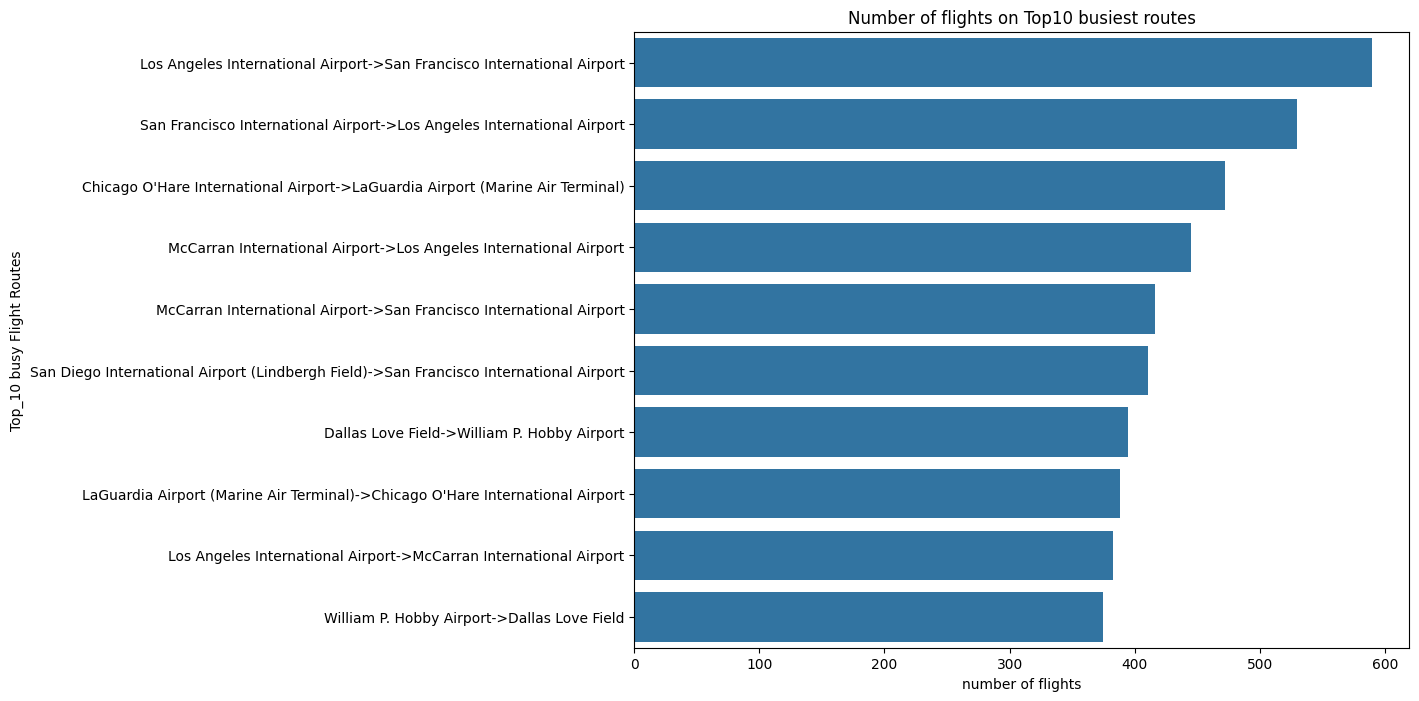

In [6]:
# bar plot on route=org+dest
df['Route']=df['Org_Airport']+'->'+df['Dest_Airport']
top_10=df.Route.value_counts().head(10).reset_index()
plt.figure(figsize=(10,8))
sns.barplot(data=top_10,y='Route',x='count')
plt.xlabel('number of flights')
plt.ylabel('Top_10 busy Flight Routes')
plt.title('Number of flights on Top10 busiest routes')
plt.show()

                        Airline  Count
0        Southwest Airlines Co.  40640
1         Skywest Airlines Inc.  21819
2         United Air Lines Inc.  20179
3        American Airlines Inc.  13032
4  American Eagle Airlines Inc.  10422
5               US Airways Inc.   8927
6   Atlantic Southeast Airlines   4901
7          Delta Air Lines Inc.   4777
8               JetBlue Airways   2727
9          Alaska Airlines Inc.   2421


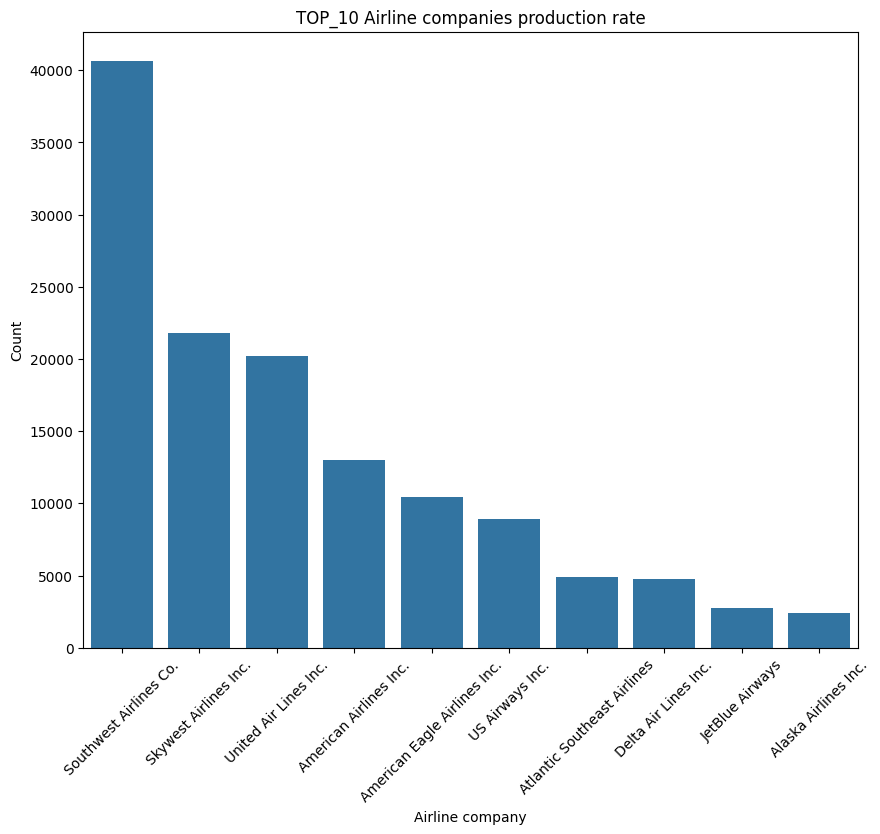

In [7]:
# count plot on airlins-top airlines
top_Airlines=df['Airline'].value_counts().head(10).reset_index()
top_Airlines.columns=['Airline','Count']
plt.figure(figsize=(10,8))
print(top_Airlines)
sns.barplot(data=top_Airlines,x='Airline',y='Count')
plt.xticks(rotation=45)
plt.xlabel('Airline company')
plt.ylabel('Count')
plt.title('TOP_10 Airline companies production rate')
plt.show()

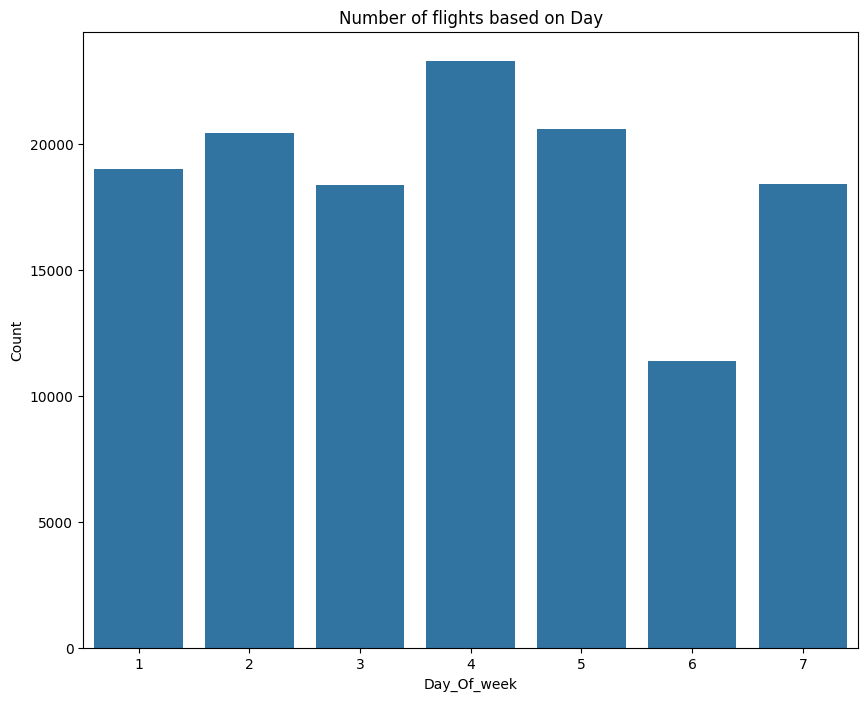

In [8]:
# count plot on month,day of week no.of flights-flight distribution based on day of week and month
Flights_Daywise=df['DayOfWeek'].value_counts().reset_index()
plt.figure(figsize=(10,8))
sns.barplot(data=Flights_Daywise,x='DayOfWeek',y='count')
plt.xlabel('Day_Of_week')
plt.ylabel('Count')
plt.title('Number of flights based on Day')
plt.show()

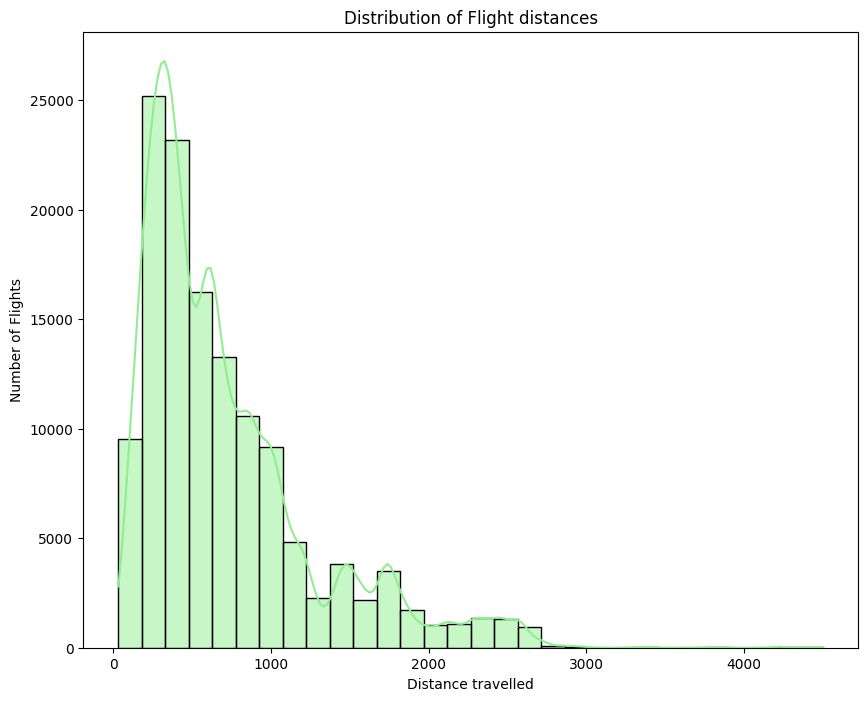

In [9]:
#distance distribution
plt.figure(figsize=(10,8))
sns.histplot(data=df,x=df['Distance'],bins=30,kde=True,color='lightgreen')
plt.xlabel('Distance travelled')
plt.ylabel('Number of Flights')
plt.title('Distribution of Flight distances')
plt.show()

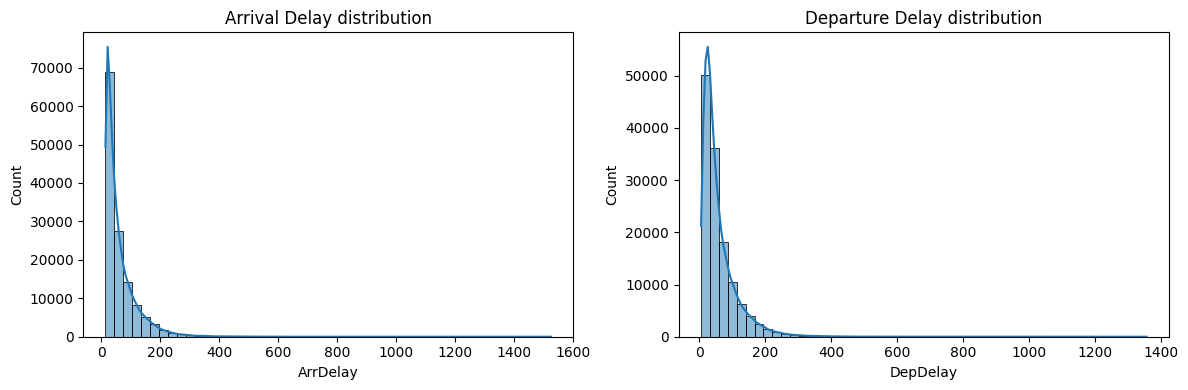

In [10]:
#Arrival and delay distributions
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.histplot(data=df,x=df['ArrDelay'],bins=50,kde=True)
plt.title('Arrival Delay distribution')
plt.subplot(1,2,2)
sns.histplot(data=df,x=df['DepDelay'],bins=50,kde=True)
plt.title('Departure Delay distribution')
plt.tight_layout()
plt.show()

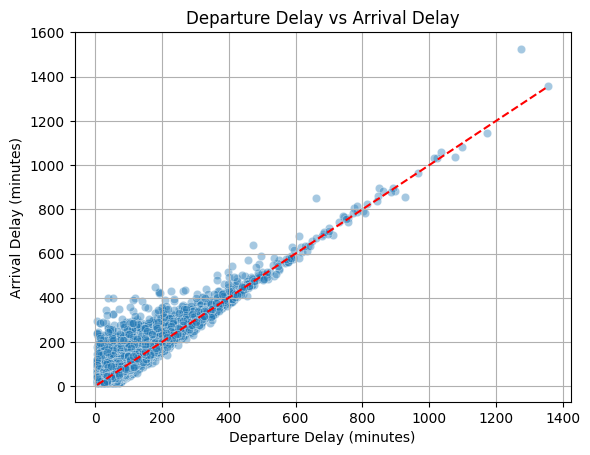

In [13]:
#bivariate Analysis 
#Arrival and departure delay analysis
sns.scatterplot(data=df, x='DepDelay', y='ArrDelay', alpha=0.4)
plt.plot([df['DepDelay'].min(), df['DepDelay'].max()],
         [df['DepDelay'].min(), df['DepDelay'].max()],
         color='red', linestyle='--')
plt.title('Departure Delay vs Arrival Delay')
plt.xlabel('Departure Delay (minutes)')
plt.ylabel('Arrival Delay (minutes)')
plt.grid()
plt.show()

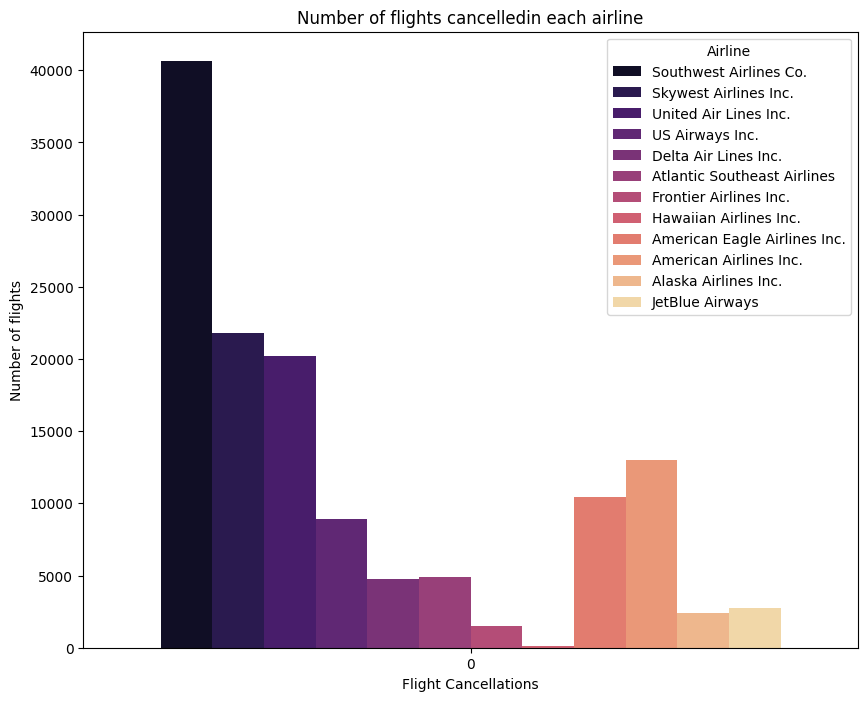

In [22]:
#Number of flights cancelled based on airline
plt.figure(figsize=(10,8))
sns.countplot(df,x='Cancelled',hue='Airline',palette='magma')
plt.xlabel('Flight Cancellations')
plt.ylabel('Number of flights')
plt.title('Number of flights cancelledin each airline')
plt.show()

In [29]:
cancelled_flights=df[df['CancellationCode']=='N']

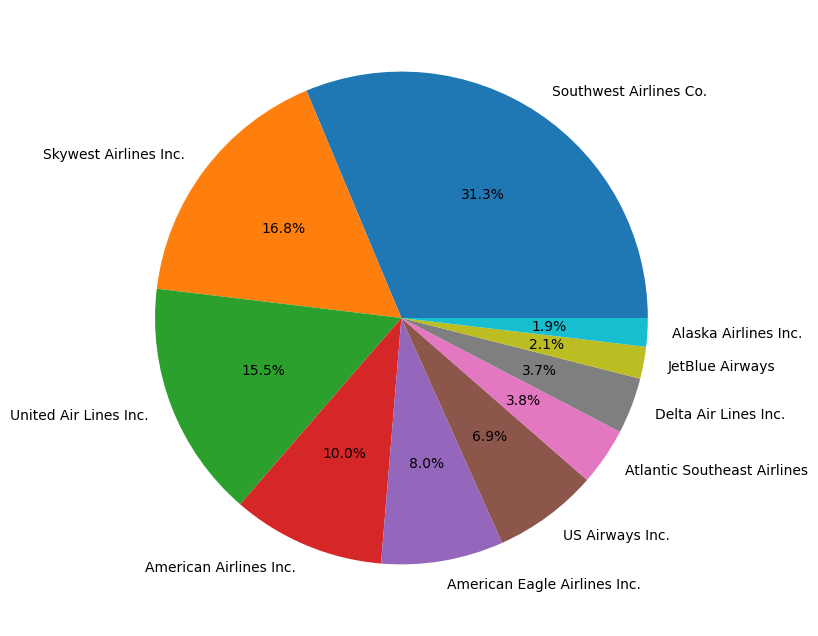

In [37]:
plt.figure(figsize=(8,8))
top_10_cancellations=cancelled_flights.Airline.value_counts().head(10)
plt.pie(top_10_cancellations,labels=top_10_cancellations.index,autopct='%1.1f%%',)
plt.show()